In [48]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
from data.real_life_meaning_mapping import real_life_meaning_mapping

In [51]:
data = pd.read_csv('../data/raw/listings.csv')

In [6]:
for col, value in data.iloc[0].items():
    print(f"{col}: {value}")

id: 13188
listing_url: https://www.airbnb.com/rooms/13188
scrape_id: 20231213195611
last_scraped: 2023-12-14
source: city scrape
name: Rental unit in Vancouver · ★4.84 · Studio · 2 beds · 1 bath
description: nan
neighborhood_overview: The uber hip Main street area is a short walk of 6 minutes to the east.  Dozens of dining options.  Great supermarkets, butcher ,cafe, pub, tiki lounge, ethnic restaurants of all sorts.  Sprinkled with antique stores and retro clothing stores.  To the West, just down the hill from the Canada Line station at King Edward is Cambie Village, theatre, flamenco dancing, fine dining, ice cream and more.
picture_url: https://a0.muscache.com/pictures/8408188/e1af63e4_original.jpg
host_id: 51466
host_url: https://www.airbnb.com/users/show/51466
host_name: Ian And Emma
host_since: 2009-11-04
host_location: Vancouver, Canada
host_about: We are a family who love to travel in comfort and enjoy the ethos and community spirit of AirBNB. We also host on AirBNB so traveler

In [7]:
data['availability_30']

0         0
1        30
2         0
3        10
4         0
         ..
19736    30
19737    23
19738    18
19739    24
19740    16
Name: availability_30, Length: 19741, dtype: int64

In [8]:
data[data['id']==13188]['calendar_updated']

0       NaN
6691    NaN
13046   NaN
Name: calendar_updated, dtype: float64

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

In [10]:
data['neighbourhood_cleansed'].unique()

array(['Riley Park', 'Downtown', 'Kensington-Cedar Cottage',
       'Hastings-Sunrise', 'Grandview-Woodland', 'Mount Pleasant',
       'West End', 'Renfrew-Collingwood', 'Kitsilano',
       'Downtown Eastside', 'Arbutus Ridge', 'Killarney', 'South Cambie',
       'Fairview', 'Dunbar Southlands', 'Strathcona', 'Shaughnessy',
       'West Point Grey', 'Kerrisdale', 'Sunset', 'Victoria-Fraserview',
       'Marpole', 'Oakridge'], dtype=object)

In [11]:
neighbourhoods_ = data['neighbourhood_cleansed'].unique()

In [39]:
def generate_time_series_data_with_ids_and_filters(start_year, end_year, listings_count):
    quarters = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='Q').to_period('Q')
    listing_ids = np.arange(1, listings_count + 1)

    # Creating a dataframe for each listing across all quarters
    data_list = []
    for listing_id in listing_ids:
        data = pd.DataFrame({
            'quarter': quarters,
            'id': listing_id
        })
        
        # Base trend factor with random noise
        base_trend = np.linspace(1, 1.3, len(data))
        noise = np.random.rand(len(data)) * 1  # Random noise
        trend_factor = base_trend + noise

        # Applying trend with noise to 'price' and 'number_of_reviews'
        data['price'] = np.round(150 + (np.random.rand(len(data)) * 850 * trend_factor), 2)
        data['number_of_reviews'] = np.random.randint(0, 50, size=len(data)) + (50 * trend_factor).astype(int)


        # Adding other variables
        data['availability_30'] = np.random.randint(0, 31, size=len(data))
        data['availability_60'] = data['availability_30'] + np.random.randint(0, 31, size=len(data))
        data['availability_90'] = data['availability_60'] + np.random.randint(0, 31, size=len(data))
        data['availability_365'] = data['availability_90'] + np.random.randint(275, 276, size=len(data))
        data['review_scores_rating'] = np.round(np.random.uniform(3.5, 5.0, size=len(data)), 2)
        data['number_of_reviews_ltm'] = np.random.randint(0, 100, size=len(data))
        data['number_of_reviews_l30d'] = np.random.randint(0, 10, size=len(data))
        data['host_response_rate'] = np.round(np.random.uniform(0.0, 1.0, size=len(data)), 2)
        data['host_acceptance_rate'] = np.round(np.random.uniform(0.0, 1.0, size=len(data)), 2)
        data['minimum_nights'] = np.random.randint(1, 8, size=len(data))
        data['maximum_nights'] = np.random.randint(30, 365, size=len(data))
        data['reviews_per_month'] = np.round(np.random.uniform(0, 10, size=len(data)), 2)
        data['host_listings_count'] = np.random.randint(1, 10, size=len(data))
        data['host_total_listings_count'] = np.random.randint(1, 10, size=len(data))
        data['first_review'] = pd.to_datetime('2010-01-01') + pd.to_timedelta(np.random.randint(0, 365*10, size=len(data)), unit='D')
        data['last_review'] = data['first_review'] + pd.to_timedelta(np.random.randint(0, 365*2, size=len(data)), unit='D')

        # Adding filtering variables
        neighbourhoods = neighbourhoods_
        data['neighbourhood'] = np.random.choice(neighbourhoods, size=len(data))

        room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
        data['room_type'] = np.random.choice(room_types, size=len(data))

        data['number_of_guests'] = np.random.randint(1, 9, size=len(data))
        data['number_of_beds'] = np.random.randint(1, 9, size=len(data))
        data['number_of_bathrooms'] = np.random.choice([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5], size=len(data))

        data_list.append(data)

    # Concatenating all listings data
    full_data = pd.concat(data_list, ignore_index=True)
    full_data['quarter'] = full_data['quarter'].dt.strftime('%Y-%q')

    return full_data

# Generating data with IDs and filtering variables for 1000 listings from 2008 to 2023
simulated_data_with_ids_and_filters = generate_time_series_data_with_ids_and_filters(2010, 2023, 1000)
simulated_data_with_ids_and_filters.head()

,quarter,id,price,number_of_reviews,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews_ltm,...,reviews_per_month,host_listings_count,host_total_listings_count,first_review,last_review,neighbourhood,room_type,number_of_guests,number_of_beds,number_of_bathrooms
0,2010-1,1,905.17,72,27,56,80,355,4.59,69,...,3.06,4,4,2013-12-24,2015-06-13,Kitsilano,Entire home/apt,5,7,3.0
1,2010-2,1,549.62,91,20,36,46,321,3.69,9,...,9.96,5,7,2015-04-20,2017-03-02,Victoria-Fraserview,Entire home/apt,4,8,4.0
2,2010-3,1,582.62,118,4,18,30,305,4.33,13,...,9.48,7,2,2016-11-11,2018-07-19,Grandview-Woodland,Entire home/apt,2,1,4.5
3,2010-4,1,488.18,88,12,38,49,324,4.90,17,...,4.40,1,6,2013-08-25,2014-07-10,West End,Private room,1,7,4.5
4,2011-1,1,368.83,123,6,32,56,331,4.22,98,...,2.60,2,6,2016-01-09,2016-12-25,West End,Entire home/apt,2,1,3.0


In [56]:
import plotly.express as px
import plotly.graph_objects as go

# Function to create a time-series plot
def create_aggregated_time_series_plot(df, y_variable=None):
    if y_variable is None:
        y_variable = 'Daily Price'
    y_name = y_variable
    y_variable = real_life_meaning_mapping[y_name]['column_name']
    df = df.copy()
    year_quarter = df['quarter'].str.split('-', expand=True)
    
    # Convert year and quarter into a Period object
    df['quarter'] = pd.PeriodIndex(year=year_quarter[0].astype(int), 
                                   quarter=year_quarter[1].astype(int), 
                                   freq='Q')
    df['quarter'] = df['quarter'].dt.strftime('%Y-Q%q')
    # Aggregating the data
    aggregated_df = df.groupby('quarter')[y_variable].mean().reset_index()
    median_aggregated_df = df.groupby('quarter')[y_variable].median().reset_index()

    # Creating an empty figure and adding both mean and median as separate traces
    fig = go.Figure()

    # Add Mean trace
    fig.add_trace(go.Scatter(x=aggregated_df['quarter'], y=aggregated_df[y_variable],
                             mode='lines', name='Mean'))

    # Adding median trend line
    fig.add_trace(go.Scatter(x=median_aggregated_df['quarter'], y=median_aggregated_df[y_variable],
                             mode='lines', name='Median', line=dict(dash='dash')))
    # Center the title
    fig.update_layout(
        title={
            'text': f'Trend of the Metric {y_name}',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    fig.update_xaxes(title_text='Quarter', tickangle=-45)
    fig.update_yaxes(title_text=f'Average Metric Value')
    return fig

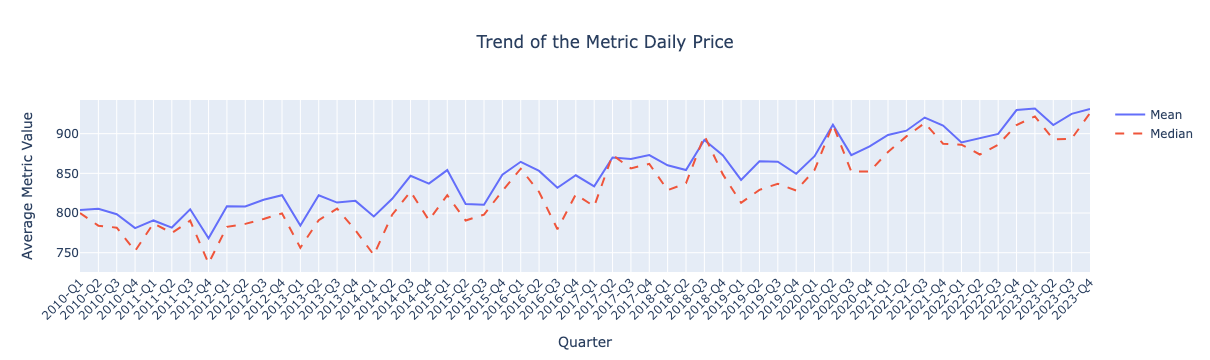

In [57]:
create_aggregated_time_series_plot(simulated_data_with_ids_and_filters,'Daily Price')

In [58]:
simulated_data_with_ids_and_filters.to_csv('../data/raw/simulated.csv',index=False)

In [3]:
import pandas as pd
pd.read_csv('../data/raw/simulated.csv').shape
pd.read_csv('../data/raw/listings.csv').shape

(19741, 76)